# Introduction to Classification in R
A type of machine learning task.

**Goal:** Assign predefined categories or labels to input data based on its features

> Learn patterns and relationships in data → can make predictions or decisions about new, unseen data.



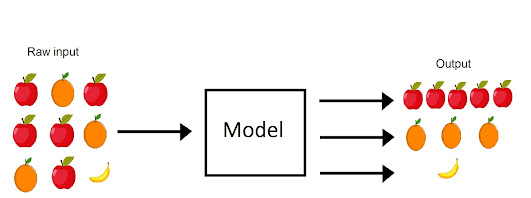

[source : pycodemates](https://www.pycodemates.com/2022/10/top-5-must-known-classification-algorithms-machine-learning.html)



##Classification Types

*   Support vector machines (SVM)
*   Decision trees
*   Random forest
*   K-Nearest Neighbors
*   etc.

###Support Vector Machine / SVM

**Goal:** to draw a decision boundary between different classes in such a way that it maximally separates the data points

**Main idea:** find the best possible line (hyperplane) that separates different classes in your data

**Support vectors:** critical data points that lie closest to the decision boundary

**Margin:** distance between the decision boundary and the nearest data points from each class (aims to maximize)

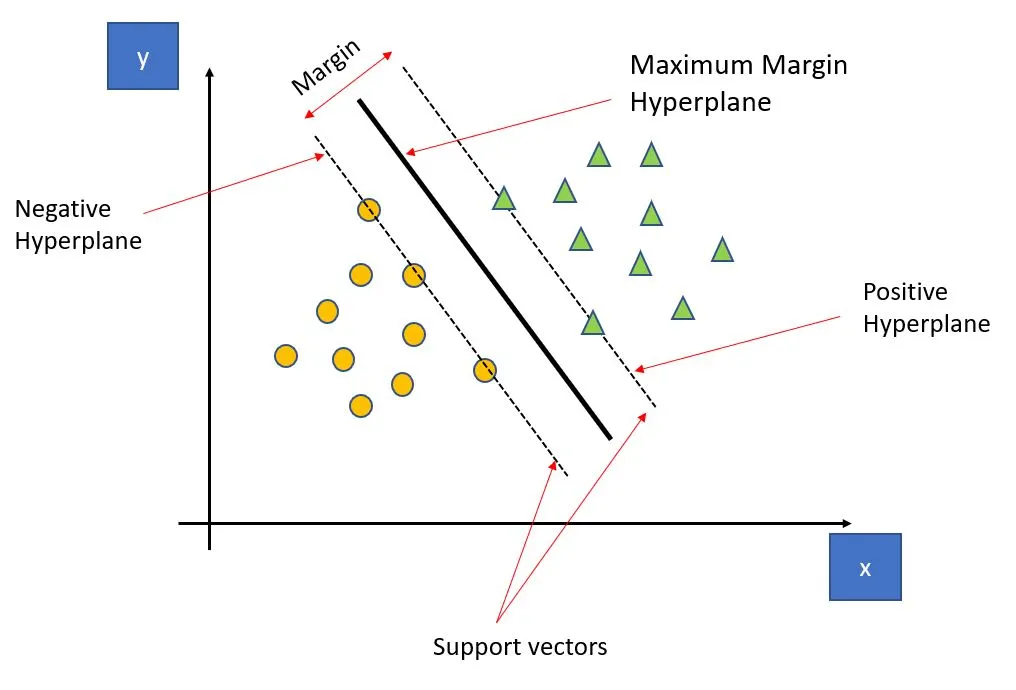

####Exercise: Support Vector Machine
We will be using a common dataset in R called Iris. This dataset has observations on three different Iris species. We will be applying Support Vector Machine to predict the unknown species based on the input variables (predictors).

#####1. Install Library e1071

In [ ]:
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




#####2. Load Library e1071

In [ ]:
library("e1071")

#####3. Load Iris dataset

In [ ]:
# Load in the Iris data
data (iris)

In [ ]:
# Show the first few lines of the dataset
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


####4. Explore Iris dataset

Summary data for each variable

*  Min. = minimum (smallest) value
*  1st Qu. = first quartile value
*  Median = middle value
*  Mean = average value
*  3rd Qu. = third quartile value
*  Max. = maximum (biggest) value

In [ ]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [ ]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


####5. Exploratory Data Analysis (EDA)

EDA is a method to see the bigger picture of the data, commonly by using graphs. The purpose of EDA is to determine input variables (predictors) that we will be using for our SVM classification model.

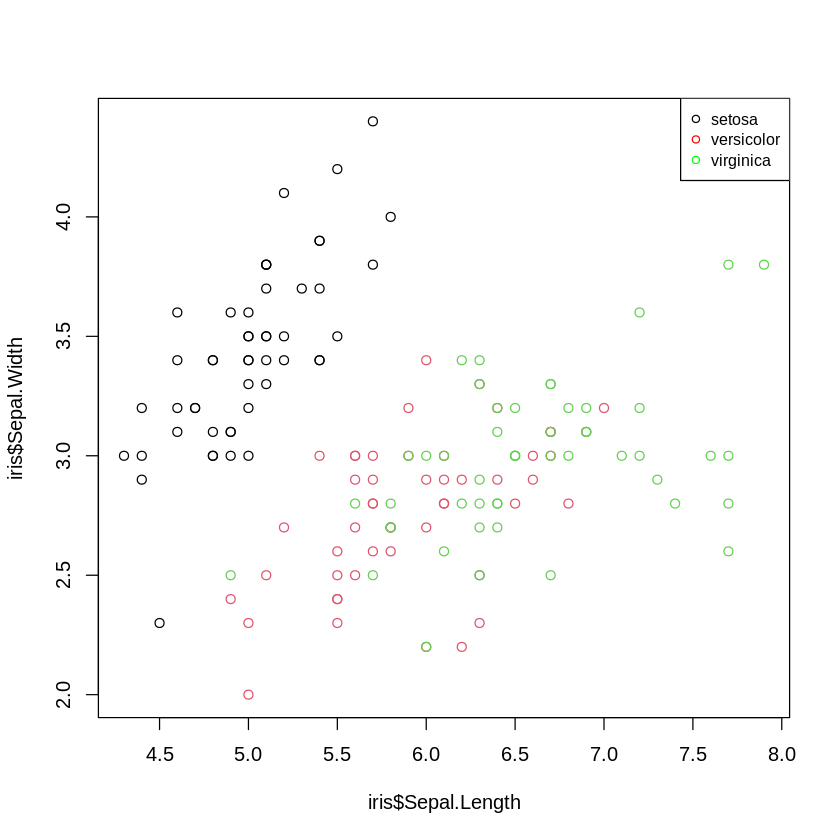

In [ ]:
# Use scatter plot to observe the data distribution based on the Sepal width and length
plot(iris$Sepal.Length,iris$Sepal.Width,col=iris$Species)
legend("topright", legend=c("setosa", "versicolor", "virginica"), col=c("black", "red", "green"), pch=1, cex=0.8)

# The points' distances between versicolor and virginia are closed and random
# meaning it would be difficult to find the hyperlane for our SVM model

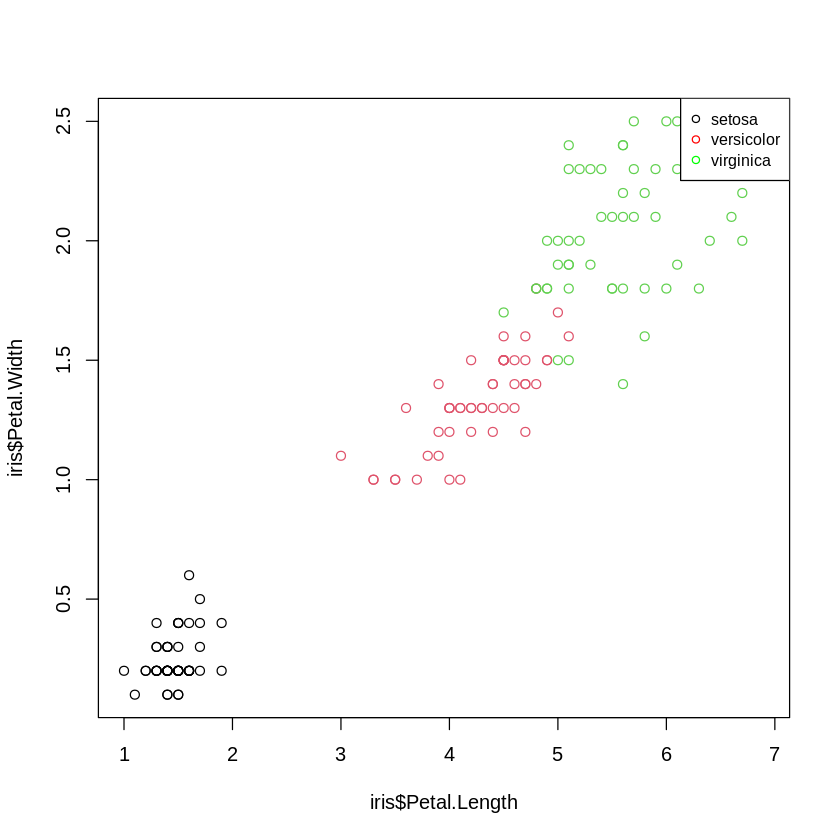

In [ ]:
# Use scatter plot to observe the data distribution based on the Petal width and length
plot(iris$Petal.Length,iris$Petal.Width,col=iris$Species)
legend("topright", legend=c("setosa", "versicolor", "virginica"), col=c("black", "red", "green"), pch=1, cex=0.8)

# All species seem to be clearly well-separated
# Thus, we will be using the Petal width and length as predictors

####6. Set seed

In [ ]:
# Set a random number to make our results consistent
set.seed(20)

####7. Create Train Data and Test Data

In [ ]:
# Ratio : 70% train data & 30% test data
s1<-sample(150,100)
s1

[1] 107 120 130  98  29  45 127  41  67 121  14  57   6 104  64   2  77 128
 [19] 110  13   5  50  54 133  93  16  51  21  25  49  97  47  38  62 147  70
 [37]  10 138  52  90  63 135  65  58  96  86  61 149  39 102 108  31  92  28
 [55]  35  15 106 116  89 137  33  88 119  83 141  59  40  20  91  48  18 118
 [73]   8 100  99  71 111 113  82  84  76   3   7  53  80  42  37  87 150  85
 [91]  11  72  74  79 103  69 125  75  55 142

In [ ]:
# Stroe the variables that we are going to use as an array variable input_v
input_v <-c("Petal.Length","Petal.Width","Species")

# Create train data from the original dataset with rows in s1 and columns input_v
iris_train<-iris[s1,input_v]

In [ ]:
# Check our train data
head(iris_train)

,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<fct>
107,4.5,1.7,virginica
120,5.0,1.5,virginica
130,5.8,1.6,virginica
98,4.3,1.3,versicolor
29,1.4,0.2,setosa
45,1.9,0.4,setosa


In [ ]:
# Create test from the original data with all rows except rows in s1 and columns input_v
iris_test<-iris[-s1,input_v]
head(iris_test)

,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<fct>
1,1.4,0.2,setosa
4,1.5,0.2,setosa
9,1.4,0.2,setosa
12,1.6,0.2,setosa
17,1.3,0.4,setosa
19,1.7,0.3,setosa


####8. Train the SVMs Model

The SVM function has several parameters, a few of them that we will be using are: formula, data, kernel, cost, and scale. More about this here: https://www.rdocumentation.org/packages/e1071/versions/1.7-14/topics/svm

In [ ]:
model<-svm(Species~.,data = iris_train, kernel="linear", cost=1, scale=TRUE)
print(model)


Call:
svm(formula = Species ~ ., data = iris_train, kernel = "linear", 
    cost = 1, scale = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  24



**Kernel:** linear
*   Mathematical functions that transform the data into a higher-dimensional space
*   e.g., linear, radial basis function, polynomial


**Cost:** controlling the trade-off between achieving a smooth decision boundary and classifying training points correctly
*   influences the SVM's optimization process by penalizing misclassifications
*   A small C = a smoother decision boundary but may misclassify some training points
*   A large C = aims to classify all training points correctly, but it could be sensitive to outliers (overfitting)


**Scale:** to indicate whether the variables should be scaled before training the model



In [ ]:
tuned<-tune(svm,Species~.,data = iris_train,kernel = "linear", ranges = list(cost = c(.001,0.01,0.1,1,5,10,100)))
summary(tuned)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.04 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.59 0.19692074
2 1e-02  0.27 0.17029386
3 1e-01  0.06 0.09660918
4 1e+00  0.04 0.05163978
5 5e+00  0.05 0.05270463
6 1e+01  0.05 0.05270463
7 1e+02  0.06 0.06992059


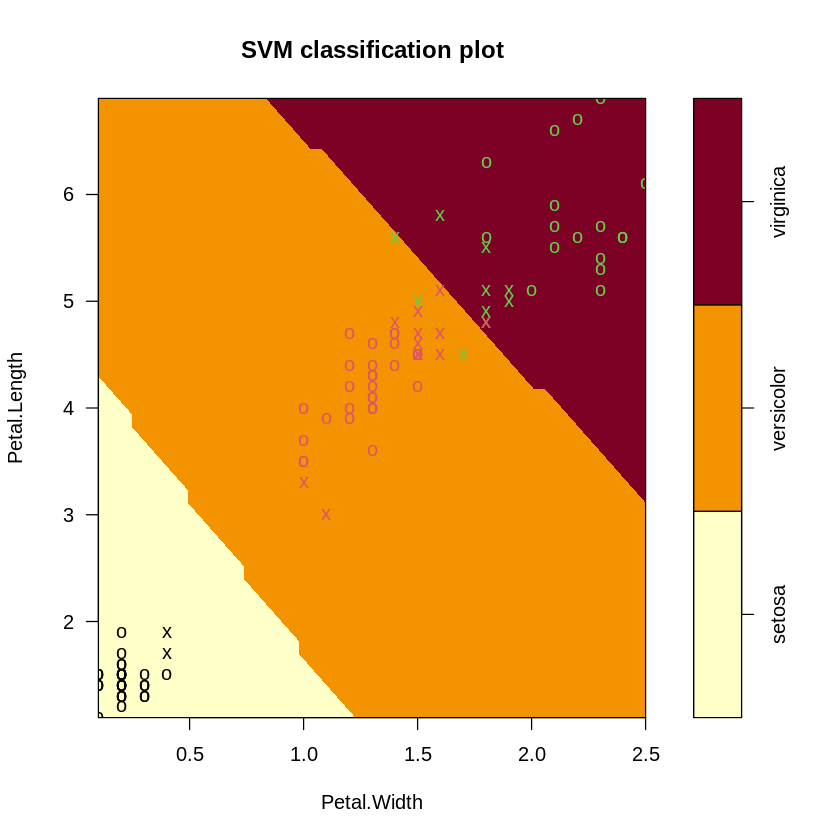

In [ ]:
# Let's visualize the hyperplane
plot(model,iris_train[,input_v])

####9. Prediction

We have trained our SVM model, now we are going to predict the species from our test data. By doing so, we will see how well our SVM model works.

In [ ]:
# Let's see the first few lines of our test data
head(iris_test[,input_v[-3]])

,Petal.Length,Petal.Width
,<dbl>,<dbl>
1,1.4,0.2
4,1.5,0.2
9,1.4,0.2
12,1.6,0.2
17,1.3,0.4
19,1.7,0.3


In [ ]:
# Predict the species for each observartions in our test data
p<-predict(model,iris_test[,input_v[-3]],type="class")
print(p)

         1          4          9         12         17         19         22 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        23         24         26         27         30         32         34 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        36         43         44         46         56         60         66 
    setosa     setosa     setosa     setosa versicolor versicolor versicolor 
        68         73         78         81         94         95        101 
versicolor versicolor  virginica versicolor versicolor versicolor  virginica 
       105        109        112        114        115        117        122 
 virginica  virginica  virginica  virginica  virginica  virginica  virginica 
       123        124        126        129        131        132        134 
 virginica  virginica  virginica  virginica  virginica  virginica versicolor 
       136        139        140        143        144        14

In [ ]:
# Show the true species from the 50 observations in our test data
print(iris_test[,3])

 [1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     setosa     setosa     setosa    
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] versicolor versicolor versicolor virginica  virginica  virginica 
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica  virginica  virginica  virginica 
[49] virginica  virginica 
Levels: setosa versicolor virginica


####10. Evaluation

In [ ]:
# Let's see how many observations we predicted correctly and incorrectly
table(p,iris_test[,3])

            
p            setosa versicolor virginica
  setosa         18          0         0
  versicolor      0          8         1
  virginica       0          1        22

In [ ]:
# How accurate is our SVM model on this data?
mean(p==iris_test[,3])

[1] 0.96

#####The score result above means our Support Vector Machine model has 96% accuracy on predicting our dataset.

### Advantages vs. Challenges of SVM
**Advantages:**
1.   Effective in high dimensional spaces
    *   Works well even when the number of features is greater than the number of samples
2.   Robust to overfitting

**Challenges:**
1.   Computationally expensive for large datasets
2.   The performance is sensitive to the choice of parameters, and tuning is often required

###Conclusion

From our results above, we can predict iris species by using SVM classification with an accuracy 96%. We made our predictions based on two predictors: petal width and length.


- Classification is like **teaching** a computer to **recognize and categorize things based on their features**.
- The **goal** is for the algorithm to generalize from the examples it has seen during training and **accurately classify new, unseen examples**.